# Mental Health in NZ


In [1]:
#install.packages("readxl")
install.packages("hrbrthemes")
install.packages("reshape2")

library(tidyverse)
library(rvest)
library(readxl)
library(reshape2)
library(scales)
library(hrbrthemes)
library(waffle)
library(stringi)

options(repr.plot.width=15, repr.plot.height=15, repr.plot.pointsize=1000) # Setting plot size as a global option.

base_theme <- theme(plot.title=element_text(size=30), # Setting a default size for all text in our plots.
                    axis.title=element_text(size=30),
                    axis.text.x=element_text(size=15),
                    axis.text.y=element_text(size=15),
                    legend.title=element_text(size=25),
                    legend.text=element_text(size=20)) 


The downloaded binary packages are in
	/var/folders/xk/xq0cwh3n7fz7v_0827s1pq400000gn/T//Rtmp6xWSvQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/xk/xq0cwh3n7fz7v_0827s1pq400000gn/T//Rtmp6xWSvQ/downloaded_packages


── Attaching packages ──────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘tibble’ was built under R version 4.1.1”
── Conflicts ─────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warning message:
“package ‘hrbrthemes’ was built under R version 4.1.1”
NOTE: Either Arial Narrow or Robo

In [45]:
#ignor waring
defaultW <- getOption("warn") 
options(warn = -1) 

In [147]:
#import all functions we need
source('lib/moh.r')

In [133]:
#first we get all xlsx file links from url
file_metadata_df <- get_moh_file_data()
file_metadata_df

year,file_name,url,separator
<dbl>,<chr>,<chr>,<chr>
2020,mental_health2020.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2019-20-tables,","
2019,mental_health2019.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2018-19-tables,","
2018,mental_health2018.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2017-18-tables,","
2017,mental_health2017.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2016-17-tables,","
2016,mental_health2016.xlsx,https://www.health.govt.nz/publication/mental-health-and-addiction-service-use-2015-16,","
2015,mental_health2015.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2014-15,&
2014,mental_health2014.xlsx,https://www.health.govt.nz//publication/mental-health-and-addiction-service-use-2013-14,&
2011,mental_health2011.xlsx,https://www.health.govt.nz/system/files/documents/publications/mh_201011_revised_mar2020.xlsx,&
2012,mental_health2012.xlsx,https://www.health.govt.nz/system/files/documents/publications/mh_201112_revised_mar2020.xlsx,&


In [134]:
get_legacy_files()
get_files_outside_norm()

In [135]:
#two different way get first table of total group data
clients_by_age_ethnic_group_df <- data.frame(year=double(),
                                             gender=character(), 
                                             ethnic_group=character(),
                                             age_group=character(),
                                             amount=integer()) 

In [136]:
full_clients_by_gender_ethnic_df <- get_all_year_clients_by_gender_ethnic_group(clients_by_age_ethnic_group_df, 
                                                                                file_metadata_df)

In [137]:
# lets get the years outside of the norm
#year from 2002-2007, 2010-2019
full_clients_by_gender_ethnic_df <- full_clients_by_gender_ethnic_df %>% 
                                    rbind(get_all_a1sheet_2002_2007_df()) %>%  
                                    rbind(get_2010_client_ages()) %>%
                                    arrange(year) %>% 
                                    filter(gender!='Total') %>%
                                    filter(ethnic_group!='Total') 


New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1



In [43]:
#full_clients_by_gender_ethnic_df <- full_clients_by_gender_ethnic_df %>% rbind(get_2001_2007_file_df('mental_health2006.xls',2006))

In [139]:
#lets clean this dataframe a littleMaori
full_clients_by_gender_ethnic_df <- full_clients_by_gender_ethnic_df %>% mutate(ethnic_group=gsub("Maori", "Māori", ethnic_group),
                                                                                age_group=gsub('-', '–', age_group))

Saving 21 x 21 in image



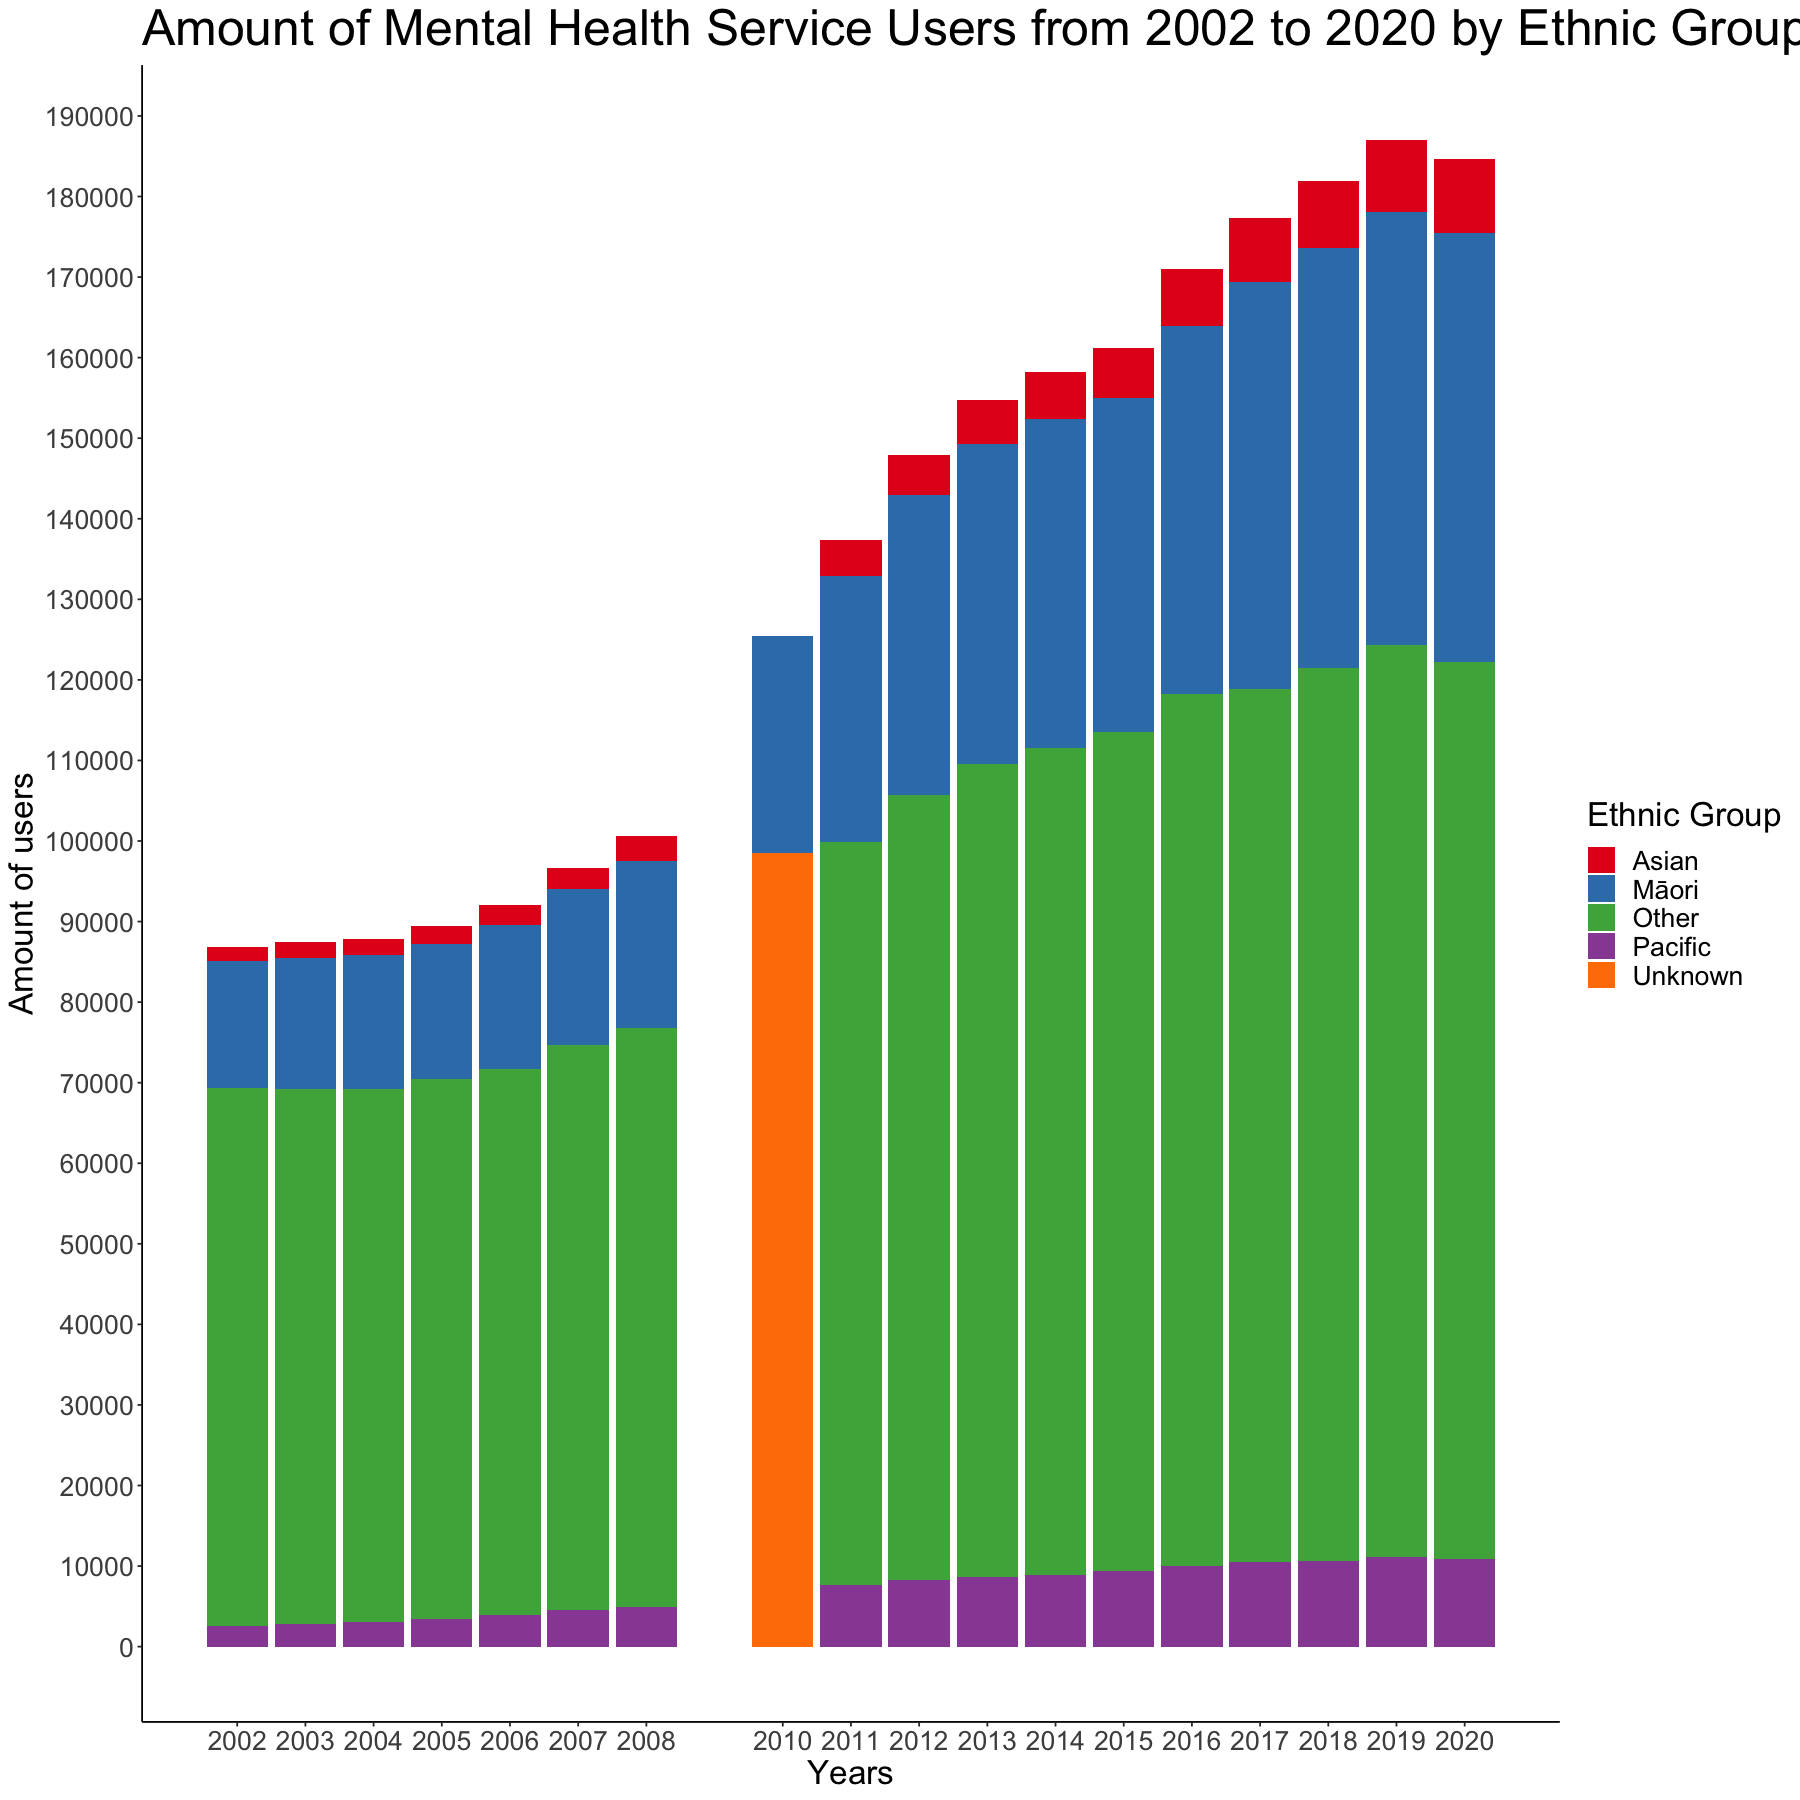

In [160]:
years <- full_clients_by_gender_ethnic_df %>% select(year) %>% distinct()
full_clients_by_gender_ethnic_df %>% #filter(gender=='Male') %>%
                                     group_by(year, ethnic_group) %>% 
                                     select(year, ethnic_group, amount) %>%
                                     summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the mean amount of users for each user type by hour (droping the last column)
                                     ggplot( aes(fill=ethnic_group, y=sum_amount, x=year)) + 
                                     geom_bar(position="stack", stat="identity") + 
                                     scale_x_continuous(breaks=years$year) + 
                                     labs(x= "Years", 
                                          y='Amount of users',
                                          fill='Ethnic Group',
                                          title='Amount of Mental Health Service Users from 2002 to 2020 by Ethnic Group') +
                                     theme_classic() + theme(plot.title = element_text(size=30),
                                                            text = element_text(size=20))  +
                                     scale_fill_brewer(palette="Set1") +  #assigning pallete
                                     scale_y_continuous(breaks=seq(0, 2000000, 10000))
ggsave('graphs/amount_ouf_users.png', scale=3)

Saving 21 x 21 in image



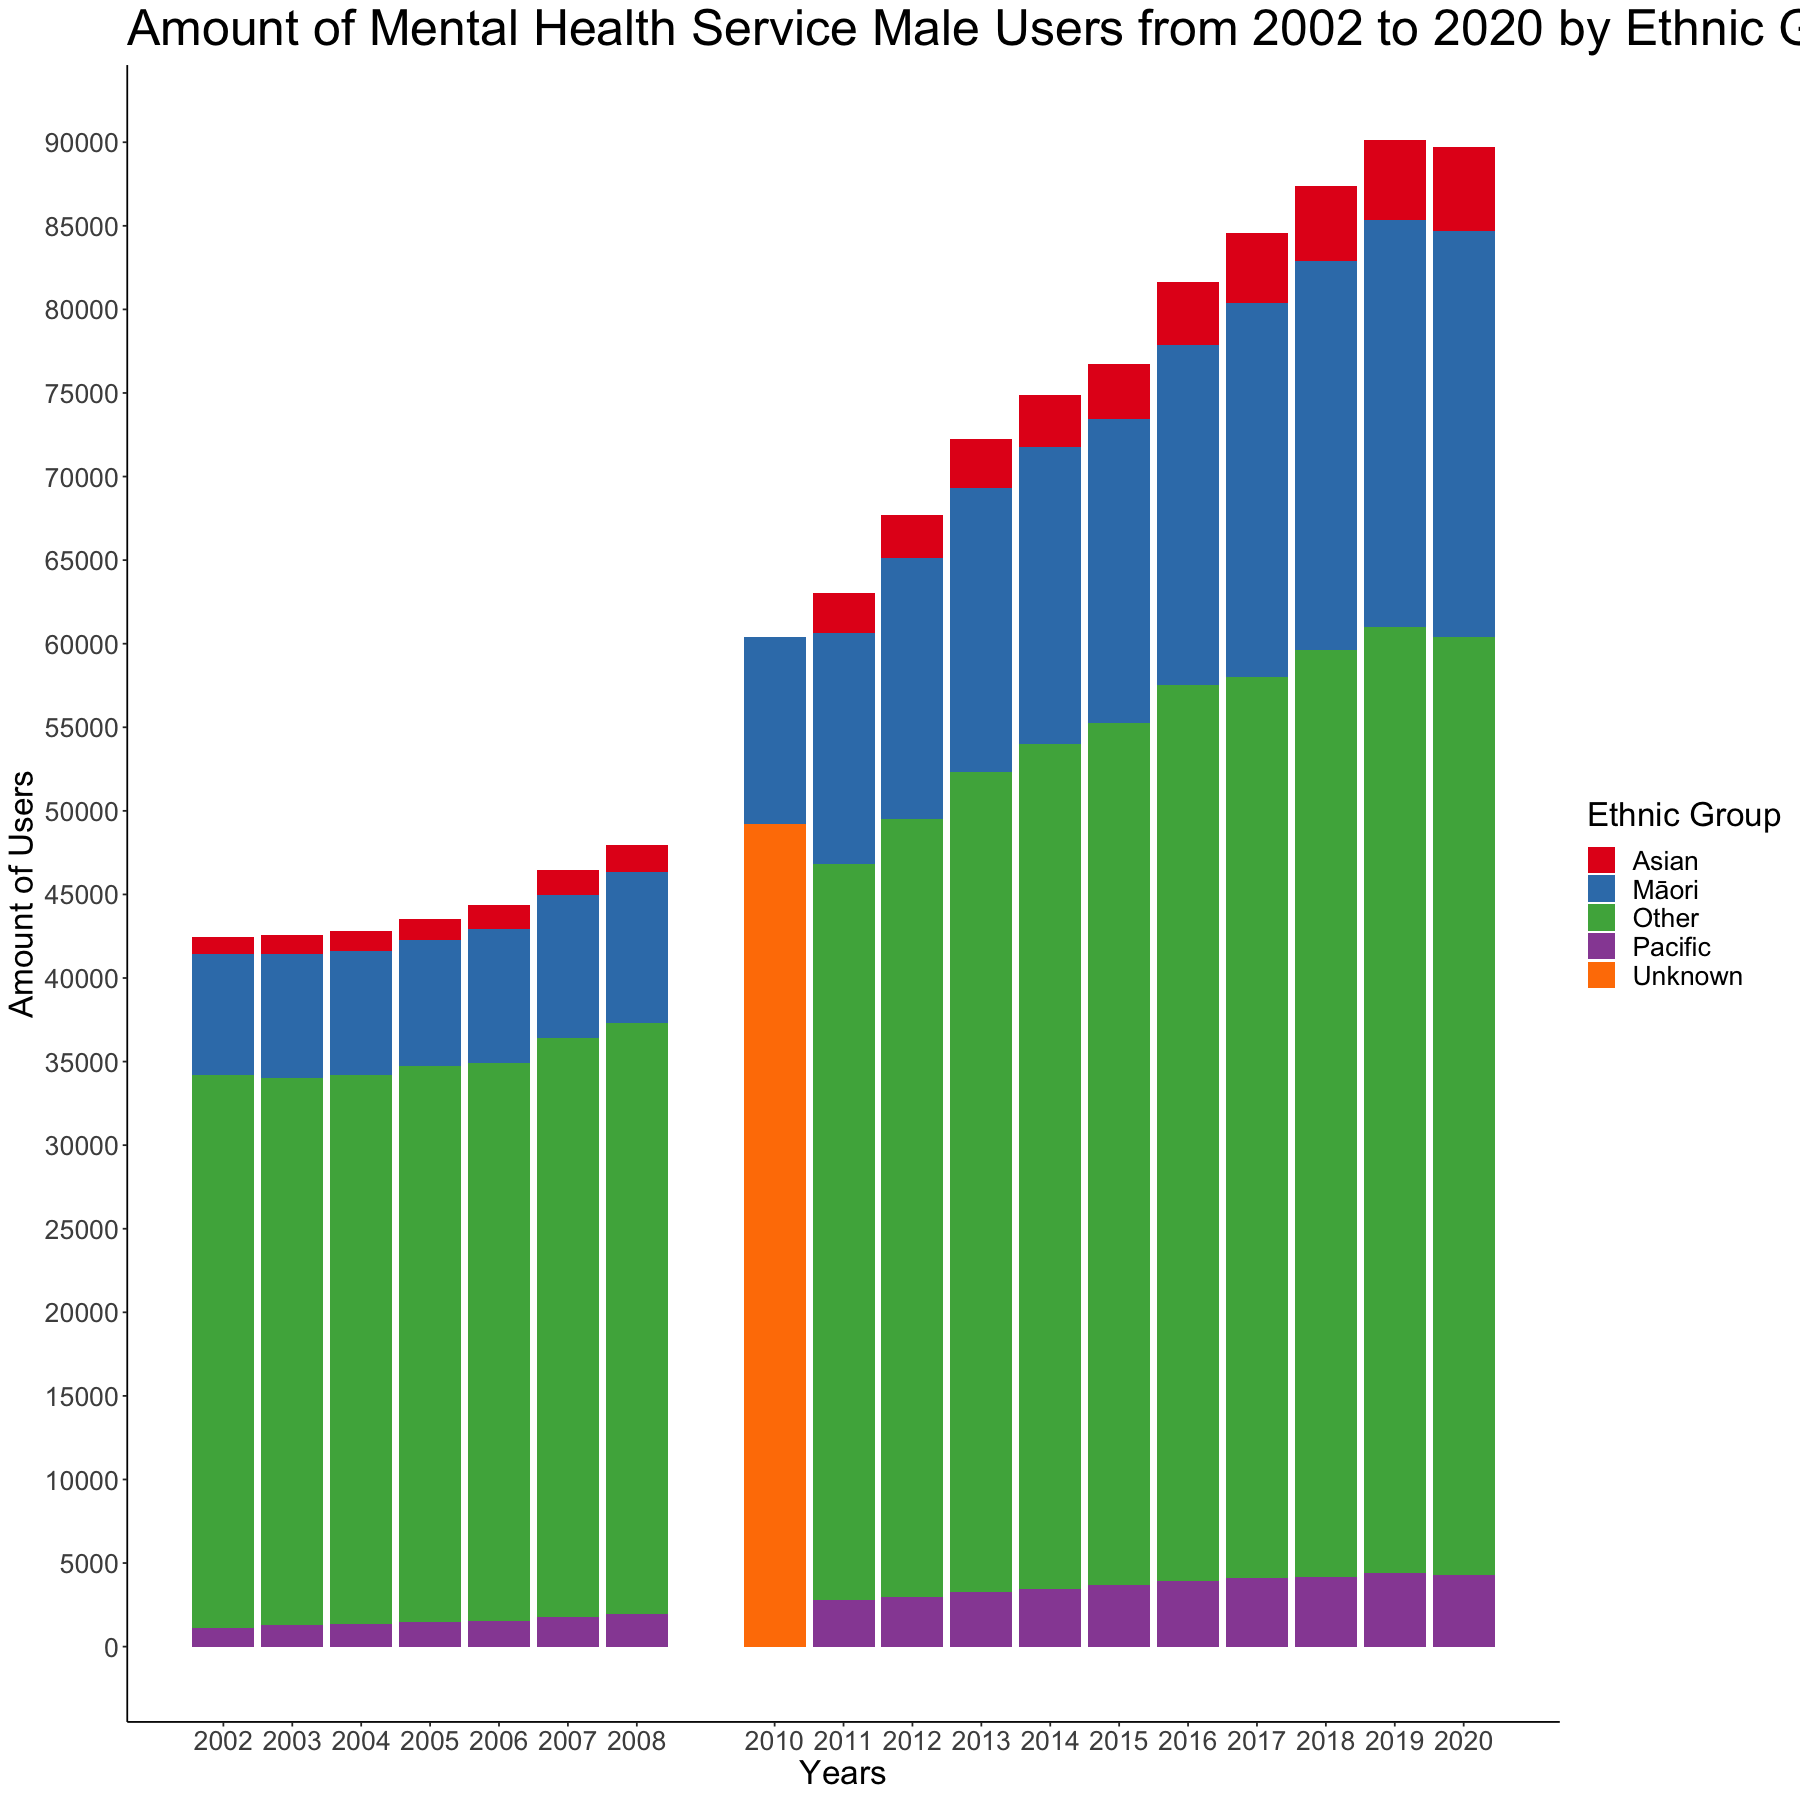

In [159]:
full_clients_by_gender_ethnic_df %>% filter(gender=='Female') %>%
                                     group_by(year, ethnic_group) %>% 
                                     select(year, ethnic_group, amount) %>%
                                     summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the mean amount of users for each user type by hour (droping the last column)
                                     ggplot( aes(fill=ethnic_group, y=sum_amount, x=year)) + 
                                     geom_bar(position="stack", stat="identity") + 
                                     scale_x_continuous(breaks=years$year) + 
                                     labs(x= "Years", 
                                          y='Amount of Users',
                                          fill='Ethnic Group',
                                          title='Amount of Mental Health Service Male Users from 2002 to 2020 by Ethnic Group') +
                                     theme_classic() + theme(plot.title = element_text(size=30),
                                                            text = element_text(size=20))  +
                                     scale_fill_brewer(palette="Set1") +  #assigning pallete
                                     scale_y_continuous(breaks=seq(0, 200000, 5000))
ggsave('graphs/amount_ouf_female_users.png', scale=3)

Saving 21 x 21 in image



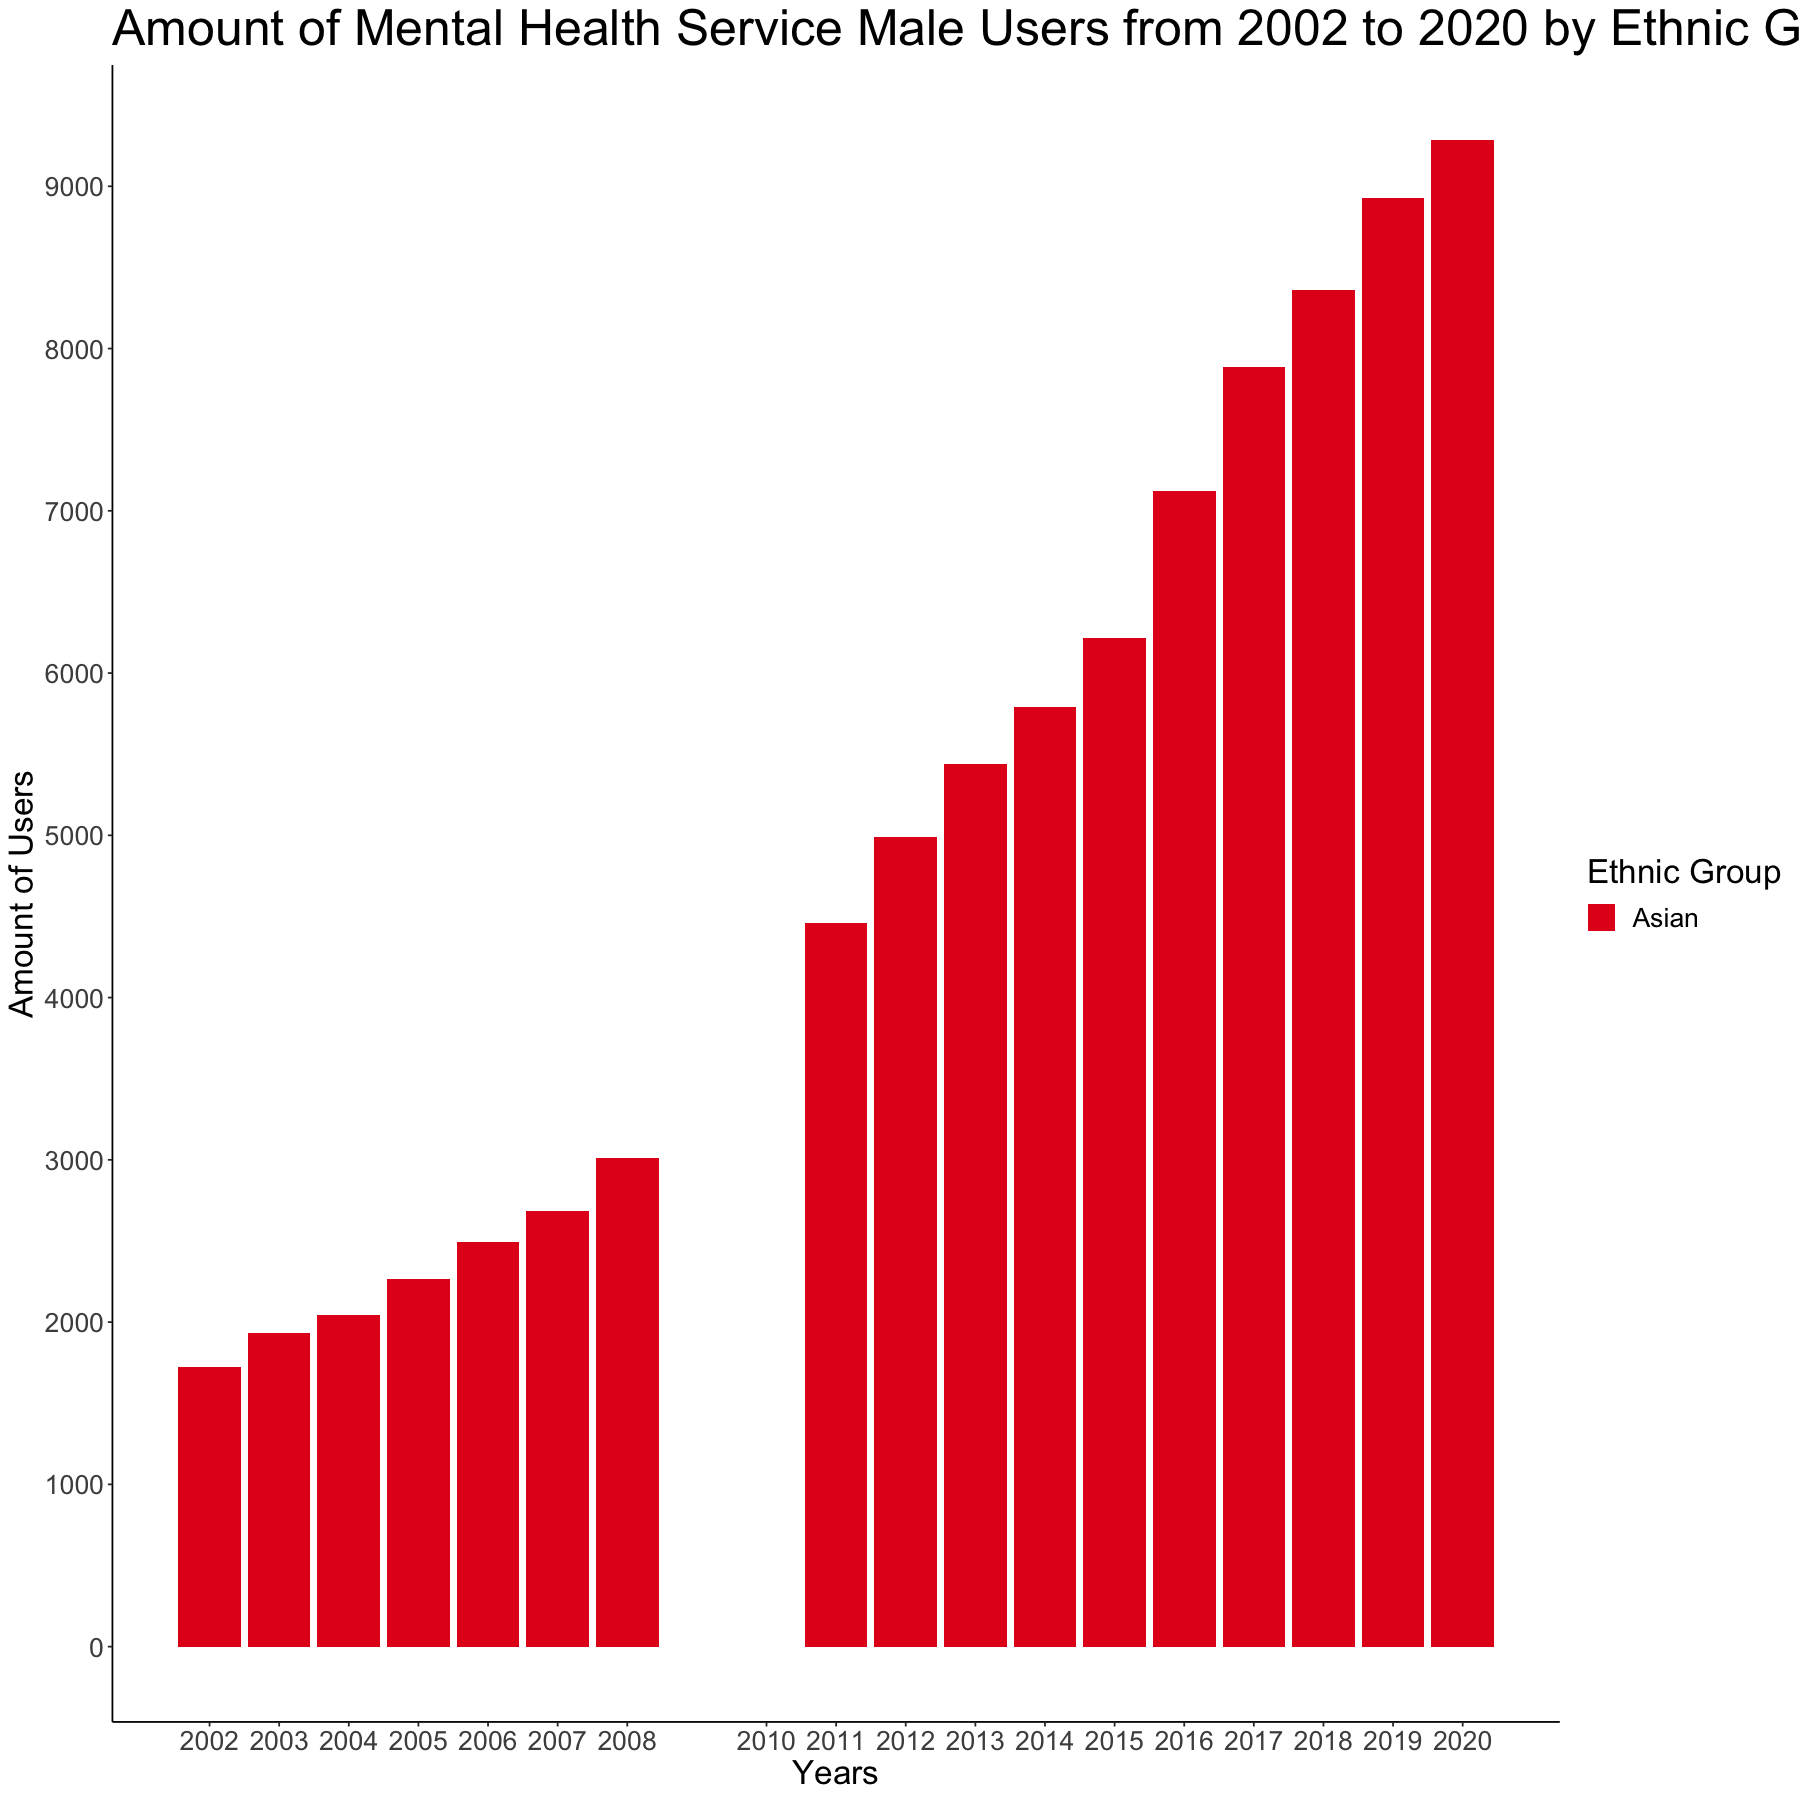

In [142]:
full_clients_by_gender_ethnic_df %>% filter(ethnic_group=="Asian") %>%
                                     group_by(year, ethnic_group) %>% 
                                     select(year, ethnic_group, amount) %>%
                                     summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the mean amount of users for each user type by hour (droping the last column)
                                     ggplot( aes(fill=ethnic_group, y=sum_amount, x=year)) + 
                                     geom_bar(position="stack", stat="identity") + 
                                     scale_x_continuous(breaks=years$year) + 
                                     labs(x= "Years", 
                                          y='Amount of Users',
                                          fill='Ethnic Group',
                                          title='Amount of Mental Health Service Male Users from 2002 to 2020 by Ethnic Group') +
                                     theme_classic() + theme(plot.title = element_text(size=30),
                                                            text = element_text(size=20))  +
                                     scale_fill_brewer(palette="Set1") +  #assigning pallete
                                     scale_y_continuous(breaks=seq(0, 20000, 1000))

ggsave('amount_ouf_asian_users.png', scale=3)

In [144]:
full_clients_by_gender_ethnic_df <- full_clients_by_gender_ethnic_df %>% clean_ages()
full_clients_by_gender_ethnic_df %>% pivot_wider(names_from=age_group, values_from=amount) %>% filter(year==2007)


year,gender,ethnic_group,5–,10–,15–,20–,25–,30–,35–,⋯,50–,60–,65–,70–,75–,80–,85+,0–,45–,55–
<dbl>,<chr>,<chr>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
2007,Male,Asian,57,77,155,147,151,104,107,⋯,71,18,22,28,12,5,2,7,97,50
2007,Female,Asian,21,63,180,170,143,153,170,⋯,106,35,38,29,16,11,7,9,116,81
2007,Male,Māori,512,997,1497,1231,1258,1244,1303,⋯,417,106,74,44,29,16,11,56,691,209
2007,Female,Māori,173,615,1302,923,915,984,1070,⋯,403,139,97,63,39,30,17,29,659,213
2007,Male,Other,1693,2927,3599,2911,2731,3302,3716,⋯,2213,1070,742,582,647,576,517,146,3122,1574
2007,Female,Other,693,1858,4201,2627,2536,3191,3545,⋯,2134,1288,958,775,901,1003,1099,80,2881,1633
2007,Male,Pacific,100,169,379,393,357,350,312,⋯,92,38,31,20,15,18,3,17,163,69
2007,Female,Pacific,19,117,261,194,202,191,218,⋯,76,47,38,30,17,10,13,16,127,53


Saving 21 x 21 in image



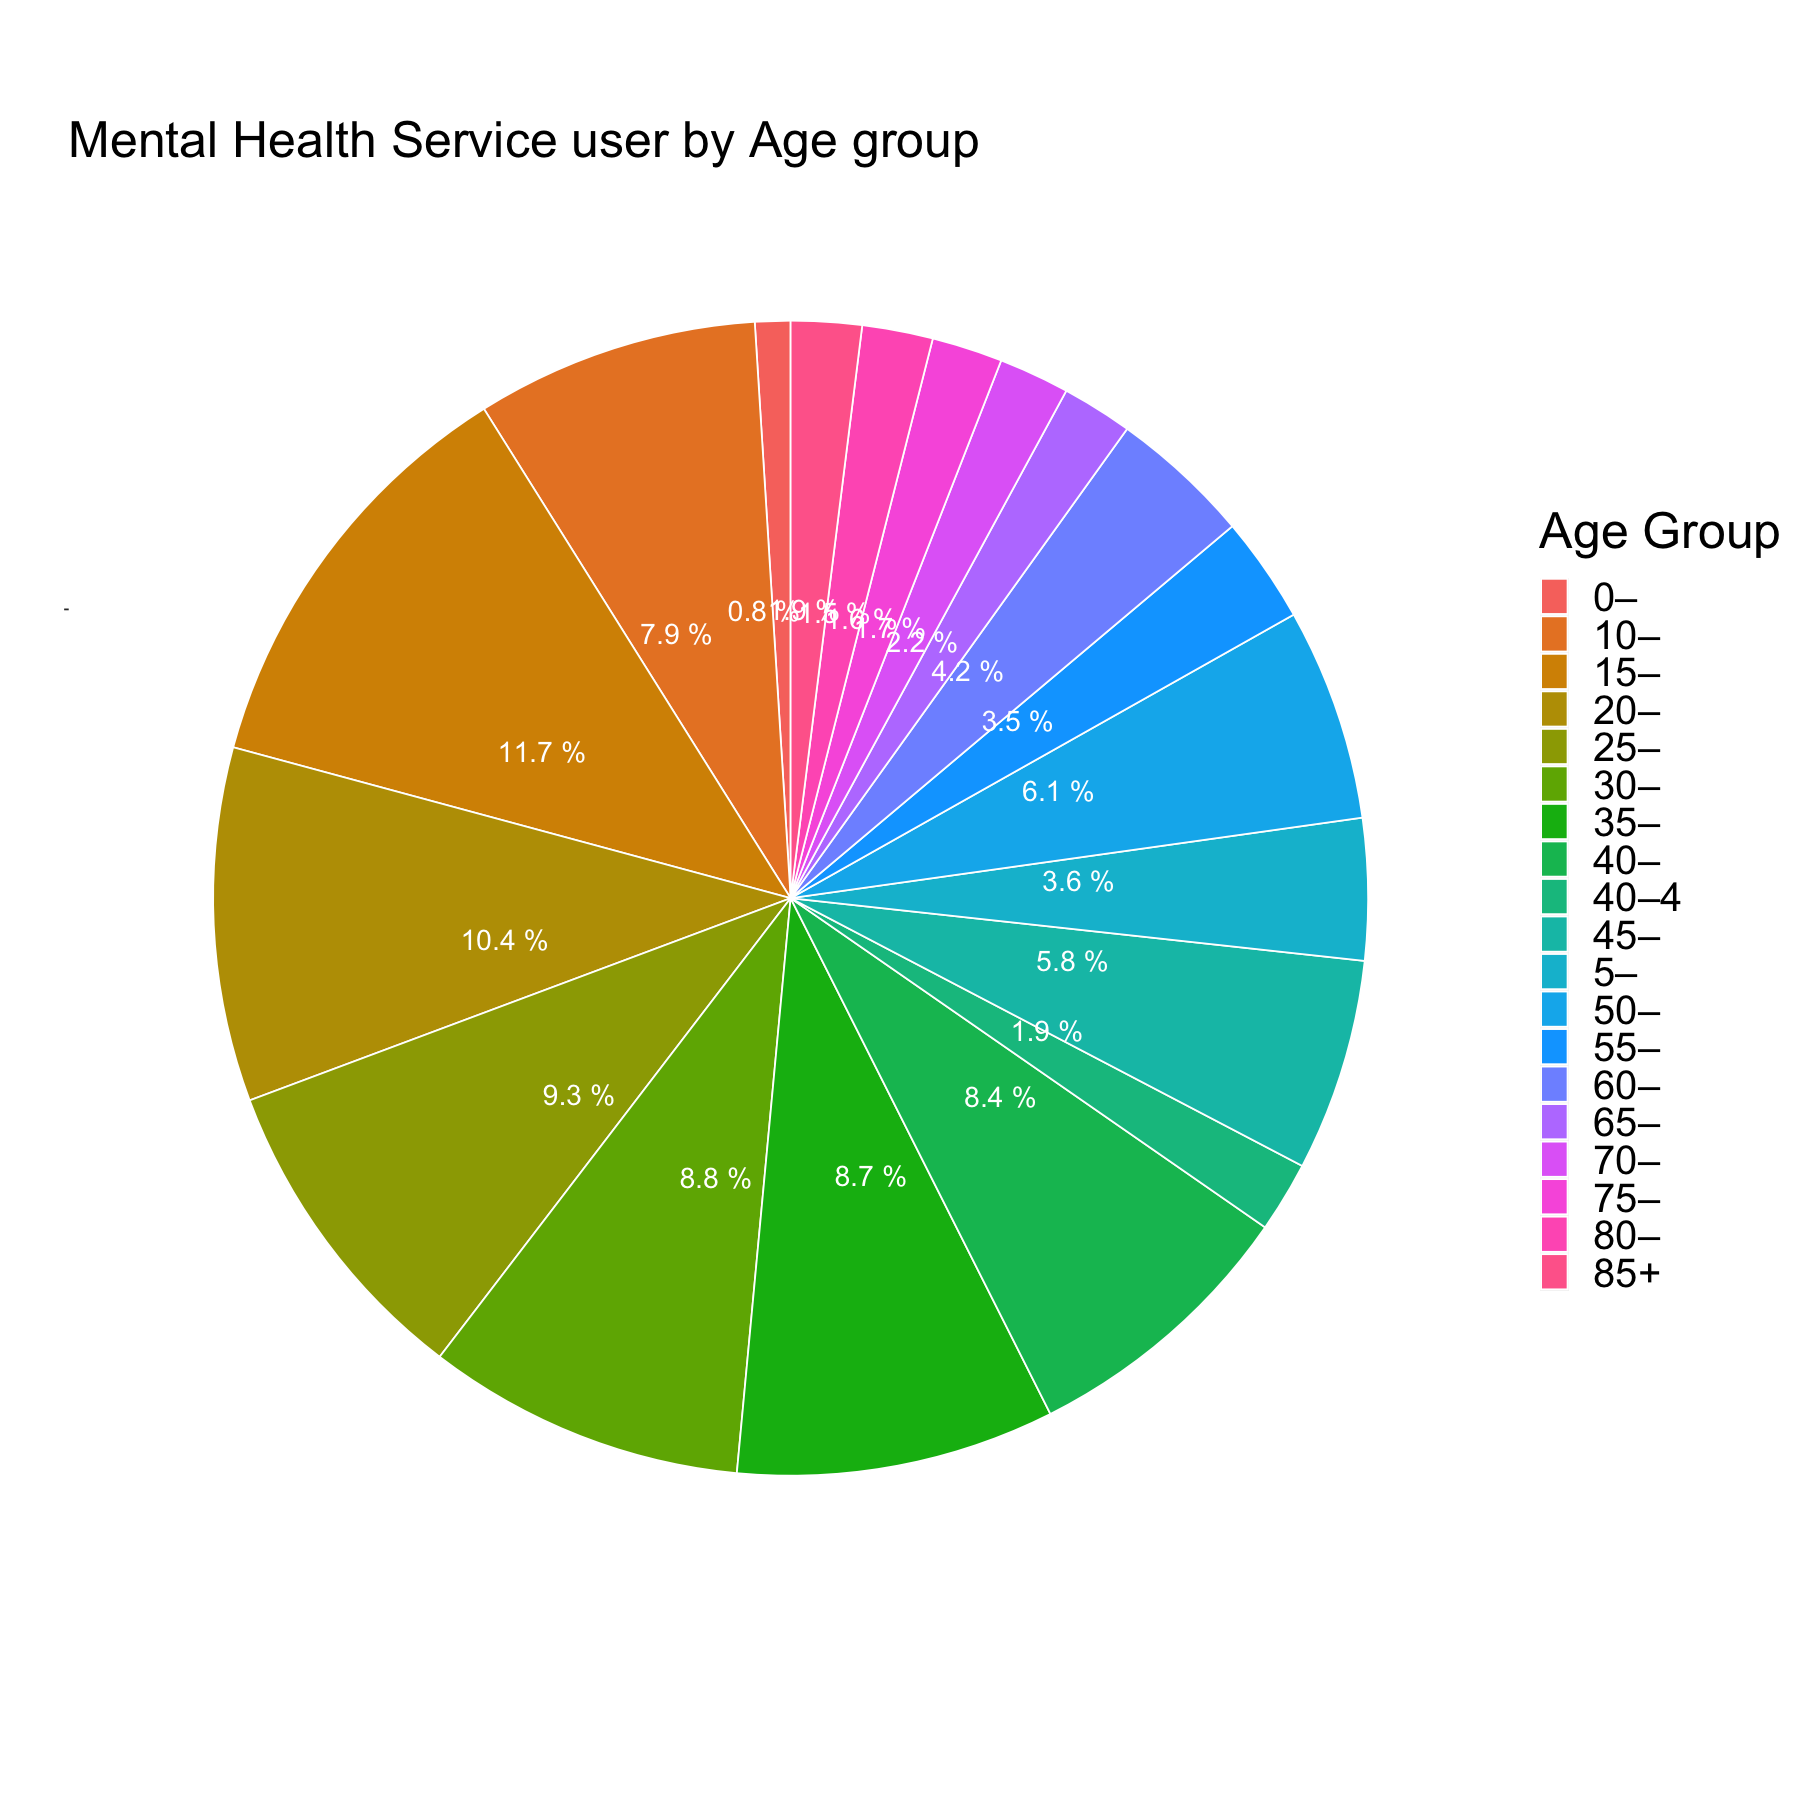

In [145]:

full_clients_by_gender_ethnic_df %>% group_by(age_group) %>% 
                                     select(age_group, amount) %>%
                                     arrange(age_group) %>%
                                     summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the mean amount of users for each user type by hour (droping the last column)
                                     ggplot( aes(x='', fill=age_group, 
                                                 y=round(sum_amount/sum(sum_amount)*100))) + 
                                     geom_bar(stat="identity",
                                              color='white') + 
                                     geom_text(aes(x=1,
                                                  y=sum_amount/sum(sum_amount)*100, # calculating values for labels on every slice of the pie.
                                                  label=paste(ifelse(round(sum_amount/sum(sum_amount)*100, digits=1) > 0,
                                                               round(sum_amount/sum(sum_amount)*100, digits=1), 
                                                                ),'%')),
                                              color='white', #setting color
                                              size=6,
                                              position = position_stack(vjust = 0.4)) +#setting the colors and stat for the piechart
                                     coord_polar(theta="y") + 
                                     labs(x= "", 
                                          y="",
                                          fill='Age Group',
                                          title='Mental Health Service user by Age group') +


                                       theme(plot.title = element_text(size=30),
                                                            text = element_text(size=30),
                                                                     axis.text = element_text(size = 0),
                                                              panel.background = element_rect(fill = "white")
)
ggsave('age_groups.png', scale=3)

In [149]:

all_data_dhb <- get_2002_to_2008_dhb_data('mental_health2002.xls', "A20", 'A5:W26', 2002) %>% 
                rbind(get_2002_to_2008_dhb_data('mental_health2003.xls', "A20", 'A5:W26', 2003)) %>% 
                rbind(get_2002_to_2008_dhb_data('mental_health2004.xls', "A20", 'A5:W26', 2004)) %>% 
                rbind(get_2002_to_2008_dhb_data('mental_health2005.xls', "A20", 'A5:W26', 2005)) %>% 
                rbind(get_2002_to_2008_dhb_data('mental_health2006.xls', "20A", 'A5:W26', 2006)) %>% 
                rbind(get_2002_to_2008_dhb_data('mental_health2007.xls', "20B", 'A5:W26', 2007)) %>% 
                rbind(get_2002_to_2008_dhb_data('mental_health2008.xls', "A20", 'A5:W26', 2008)) %>%
                rbind(get_2010_dhb_data('mental_health2010.xls', "T10 Nos Rates 0910 DHB",'A2:C24'))%>% 
                rbind(get_2011_onwards_dhb_data('mental_health2011.xlsx', 'Table12', 'A4:V4', 'A5:v25', 2011)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2012.xlsx', 'table12', 'A4:V4', 'A5:v25', 2012)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2013.xlsx', 'table12', 'A4:V4', 'A5:v25', 2013)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2014.xlsx', 'table12', 'A4:V4', 'A5:v25', 2014)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2015.xlsx', 'table12', 'A4:V4', 'A5:v25', 2015)) %>%
                rbind(get_2011_onwards_dhb_data('mental_health2016.xlsx', 'table12', 'A3:V3', 'A5:v24', 2016)) %>%
                rbind(get_2011_onwards_dhb_data('mental_health2017.xlsx', 'table12', 'A4:V4', 'A5:v24', 2017)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2018.xlsx', 'table12', 'A4:V4', 'A5:v24', 2018)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2019.xlsx', 'table12', 'A4:V4', 'A5:v24', 2019)) %>% 
                rbind(get_2011_onwards_dhb_data('mental_health2020.xlsx', 'table12', 'A4:V4', 'A5:v24', 2020))


all_data_dhb

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...

New names:
* `18` -> `18...10`
* `16` -> `16...11`
* `16` -> `16...12`
* `2` -> `2...16`
* `2` -> `2...18`
* ...

New names:
* `` -> ...1

New names:
* `2` -> `2...16`
* `2` -> `2...20`

New names:
* `` -> ...1

New names:
* `18` -> `18...7`
* `12` -> `12...10`
* `6` -> `6...11`
* `12` -> `12...12`
* `6` -> `6...13`
* ...

New names:
* `` -> ...1

New names:
* `9` -> `9...11`
* `14` -> `14...14`
* `2` -> `2...16`
* `9` -> `9...17`
* `2` -> `2...18`
* ...

New names:
* `` -> ...1

New names:
* `7` -> `7...

dhb,Northland,Waitemata,Auckland,Counties Manukau,Waikato,Lakes,Bay of Plenty,Tairawhiti,Taranaki,⋯,Hutt,Wairarapa,Nelson Marlborough,West Coast,Canterbury,South Canterbury,Otago,Southland,Unknown,year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,3130,112,91,67,32,12,14,1,3,⋯,12,0,6,4,8,2,8,3,7,2002
Waitemata,330,9065,3325,1649,186,55,109,15,55,⋯,40,9,29,4,58,8,29,22,59,2002
Auckland,67,613,5526,295,42,12,28,5,7,⋯,7,1,0,1,7,3,10,4,20,2002
Counties Manukau,62,125,457,3573,51,12,33,1,12,⋯,9,0,6,1,12,2,2,3,12,2002
Waikato,37,76,70,65,6545,197,262,17,97,⋯,20,2,8,1,17,3,5,4,4,2002
Lakes,11,15,23,20,61,2029,64,3,11,⋯,7,2,3,1,7,2,0,4,5,2002
Bay of Plenty,11,36,35,29,113,66,5167,11,10,⋯,12,0,5,3,8,0,10,7,2,2002
Tairawhiti,7,17,20,12,21,14,30,969,4,⋯,17,3,1,0,9,0,6,5,0,2002
Taranaki,4,14,16,17,33,2,11,1,3355,⋯,10,3,6,1,8,0,6,1,7,2002


In [150]:
all_data_dhb %>% sample_n(10)

dhb,Northland,Waitemata,Auckland,Counties Manukau,Waikato,Lakes,Bay of Plenty,Tairawhiti,Taranaki,⋯,Hutt,Wairarapa,Nelson Marlborough,West Coast,Canterbury,South Canterbury,Otago,Southland,Unknown,year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Canterbury,42,37,28,35,43,10,15,8,15,⋯,17,7,145,94,10482,93,0,244,72,2011
MidCentral,10,10,15,13,24,17,19,8,17,⋯,30,27,14,0,20,0,0,17,44,2014
Tairawhiti,7,11,12,13,24,10,25,1635,5,⋯,14,2,3,1,6,0,2,1,0,2007
Counties Manukau,113,287,773,7584,126,31,46,7,37,⋯,14,1,7,2,18,3,10,6,30,2007
Hutt Valley,3,12,8,8,16,5,7,6,12,⋯,3962,40,13,2,11,1,0,9,2,2012
Hawkes Bay,6,8,30,21,39,21,17,24,11,⋯,17,13,6,0,23,1,0,13,3,2011
Hawke's Bay,3,9,10,2,21,10,26,7,10,⋯,9,6,3,0,5,0,5,2,2,2005
Waitemata,731,15380,6660,5232,463,114,168,30,64,⋯,84,9,46,1,116,4,0,67,106,2014
Tairawhiti,4,11,7,11,12,8,20,1896,0,⋯,7,0,4,0,5,0,0,5,5,2016


In [151]:
all_data_dhb <- all_data_dhb %>% mutate(across(everything(), as.character))
longer_dhb_data <- all_data_dhb %>% pivot_longer(cols=-c('dhb', 'year'), names_to = "origin", values_to = "amount")
names(longer_dhb_data)[names(longer_dhb_data) == 'dhb'] <- "destination"
longer_dhb_data <- longer_dhb_data %>% select(origin, destination, amount, year)
longer_dhb_data <- longer_dhb_data %>% mutate(amount=as.integer(amount))

tot
<int>
9614


In [157]:
longer_dhb_data

origin,destination,amount,year
<chr>,<chr>,<int>,<chr>
Northland,Northland,3130,2002
Waitemata,Northland,112,2002
Auckland,Northland,91,2002
Counties Manukau,Northland,67,2002
Waikato,Northland,32,2002
Lakes,Northland,12,2002
Bay of Plenty,Northland,14,2002
Tairawhiti,Northland,1,2002
Taranaki,Northland,3,2002


Saving 21 x 21 in image



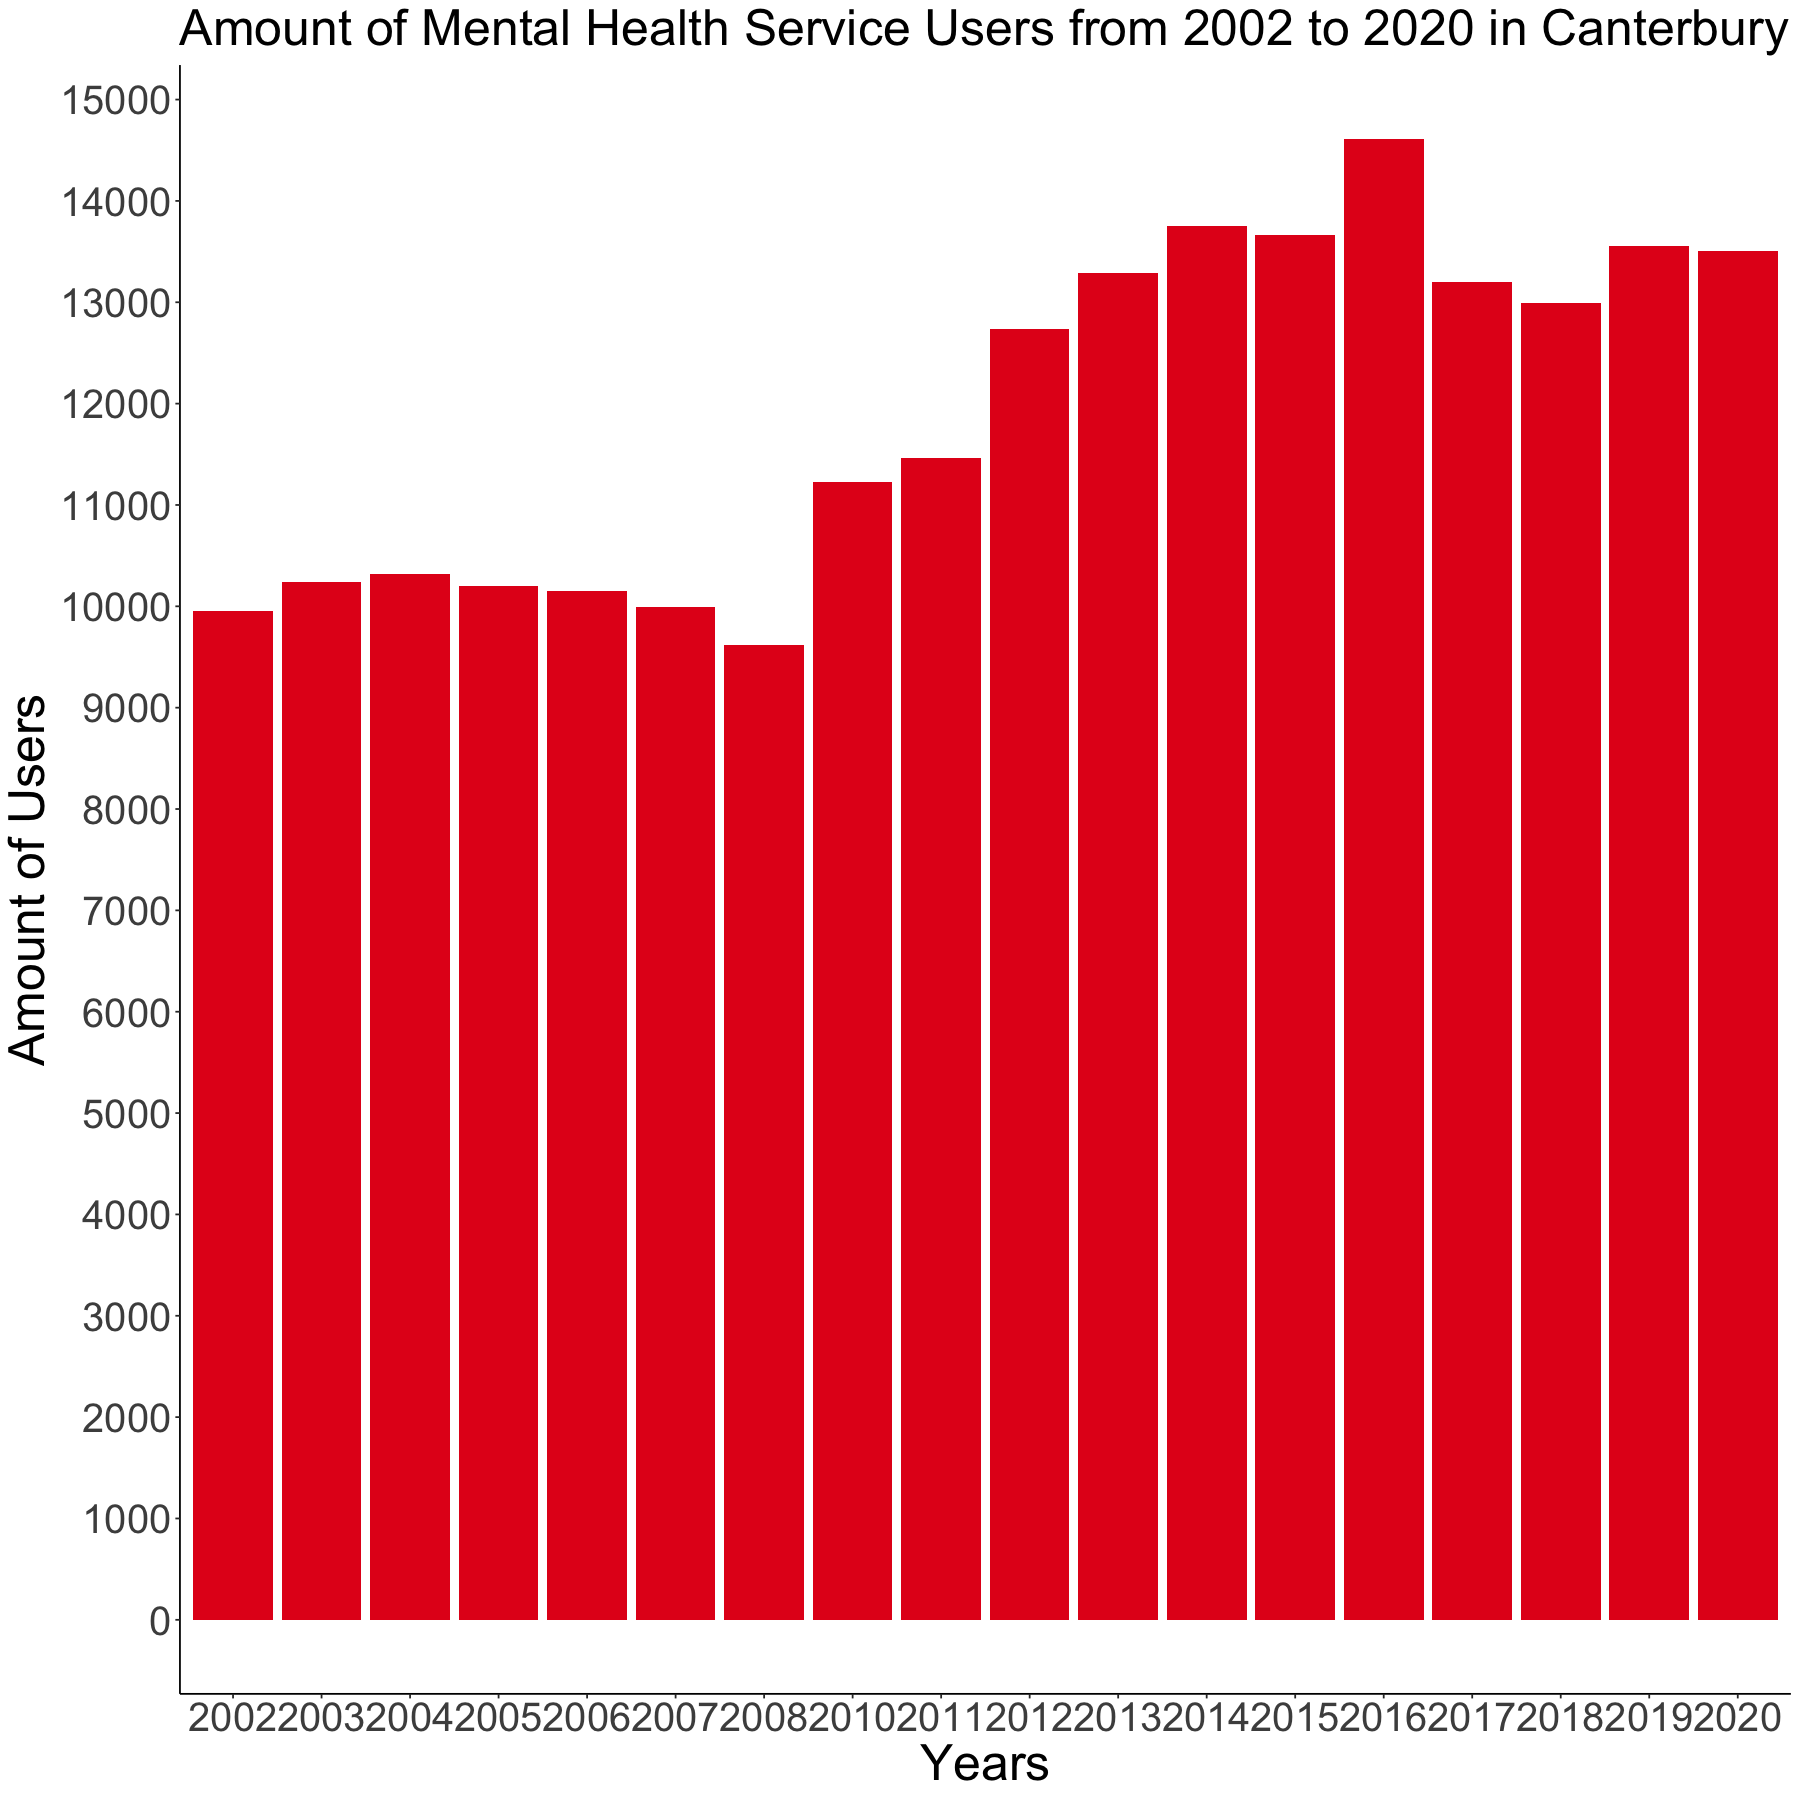

In [152]:
longer_dhb_data %>% filter(destination!='Unknown', destination=='Canterbury')%>% 
                    group_by(destination, year) %>%
                    select(destination, year,  amount) %>% #filter(year==201) %>% summarise(tot=sum(amount))#%>% 
                    summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the mean amount of users for each user type by hour (droping the last column)
                    ggplot(aes(fill=destination, y=sum_amount, x=year)) + 
                    geom_bar(position="stack", stat="identity") + 
                    labs(x= "Years", 
                      y='Amount of Users',
                      fill='DHB',
                      title='Amount of Mental Health Service Users from 2002 to 2020 in Canterbury') +
                    theme_classic() + theme(plot.title = element_text(size=30),
                                          text = element_text(size=30))  +


                    scale_fill_brewer(palette="Set1") +  #assigning pallete
                    scale_y_continuous(breaks=seq(0, 20000, 1000))+ guides(fill=FALSE)


ggsave('canterbury.png', scale=3)

In [153]:


full_colnames <- colnames(get_service_data('mental_health2002.xls', "A9",  'B5:V131', 2002))


service_data <- get_service_data('mental_health2002.xls', "A15",  'B5:V93', 2002) %>%
                rbind(get_service_data('mental_health2003.xls', "A15",  'B5:V93', 2003)) %>% 
                rbind(get_service_data('mental_health2004.xls', "A15",  'B5:V93', 2004)) %>% 
                rbind(get_service_data('mental_health2005.xls', "A15",  'B5:V93', 2005)) %>% 
                rbind(get_service_data('mental_health2006.xls', "15A",  'B5:V93', 2006, full_colnames)) %>% 
                rbind(get_service_data('mental_health2007.xls', "15B",  'B5:V93', 2007, full_colnames)) %>% 
                rbind(get_service_data('mental_health2008.xls', "A15",  'B5:V93', 2008, full_colnames)) %>%
                rbind(get_service_data('mental_health2011.xlsx', "Table23",  'A4:U73', 2011, full_colnames)) %>%
                rbind(get_service_data('mental_health2012.xlsx', "table23",  'A4:U73', 2012, full_colnames)) %>%
                rbind(get_service_data('mental_health2013.xlsx', "table23",  'A4:U73', 2013, full_colnames)) %>% 
                rbind(get_service_data('mental_health2014.xlsx', "table23",  'A4:U73', 2014, full_colnames)) %>% 
                rbind(get_service_data('mental_health2015.xlsx', "table23",  'A4:U73', 2015, full_colnames)) %>% 
                rbind(get_service_data('mental_health2016.xlsx', "table23",  'A3:U43', 2016, full_colnames)) %>% 
                rbind(get_service_data('mental_health2017.xlsx', "table23",  'A4:U73', 2017, full_colnames)) %>%
                rbind(get_service_data('mental_health2018.xlsx', "table23",  'A4:U73', 2018, full_colnames)) %>%
                rbind(get_service_data('mental_health2019.xlsx', "table23",  'A4:U73', 2019, full_colnames)) %>% 
                rbind(get_service_data('mental_health2020.xlsx', "table23",  'A4:U73', 2020, full_colnames)) 



New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3

New names:
* `` -> ...5
* `` -> ...6
* `` -> ...7
* `` -> ...8
* `` -> ...9
* ...

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3



In [154]:
long_col_name <- service_data %>% select(ends_with("-"), ends_with('+')) %>% names()
service_data <- service_data %>% pivot_longer(!c(activity, gender, year), names_to="age_group", values_to="amount")


In [155]:
service_data <- service_data %>% filter(activity!='Total') %>% mutate(activity=tolower(activity))
service_data <- service_data %>% mutate(amount=as.integer(amount))


Saving 21 x 21 in image



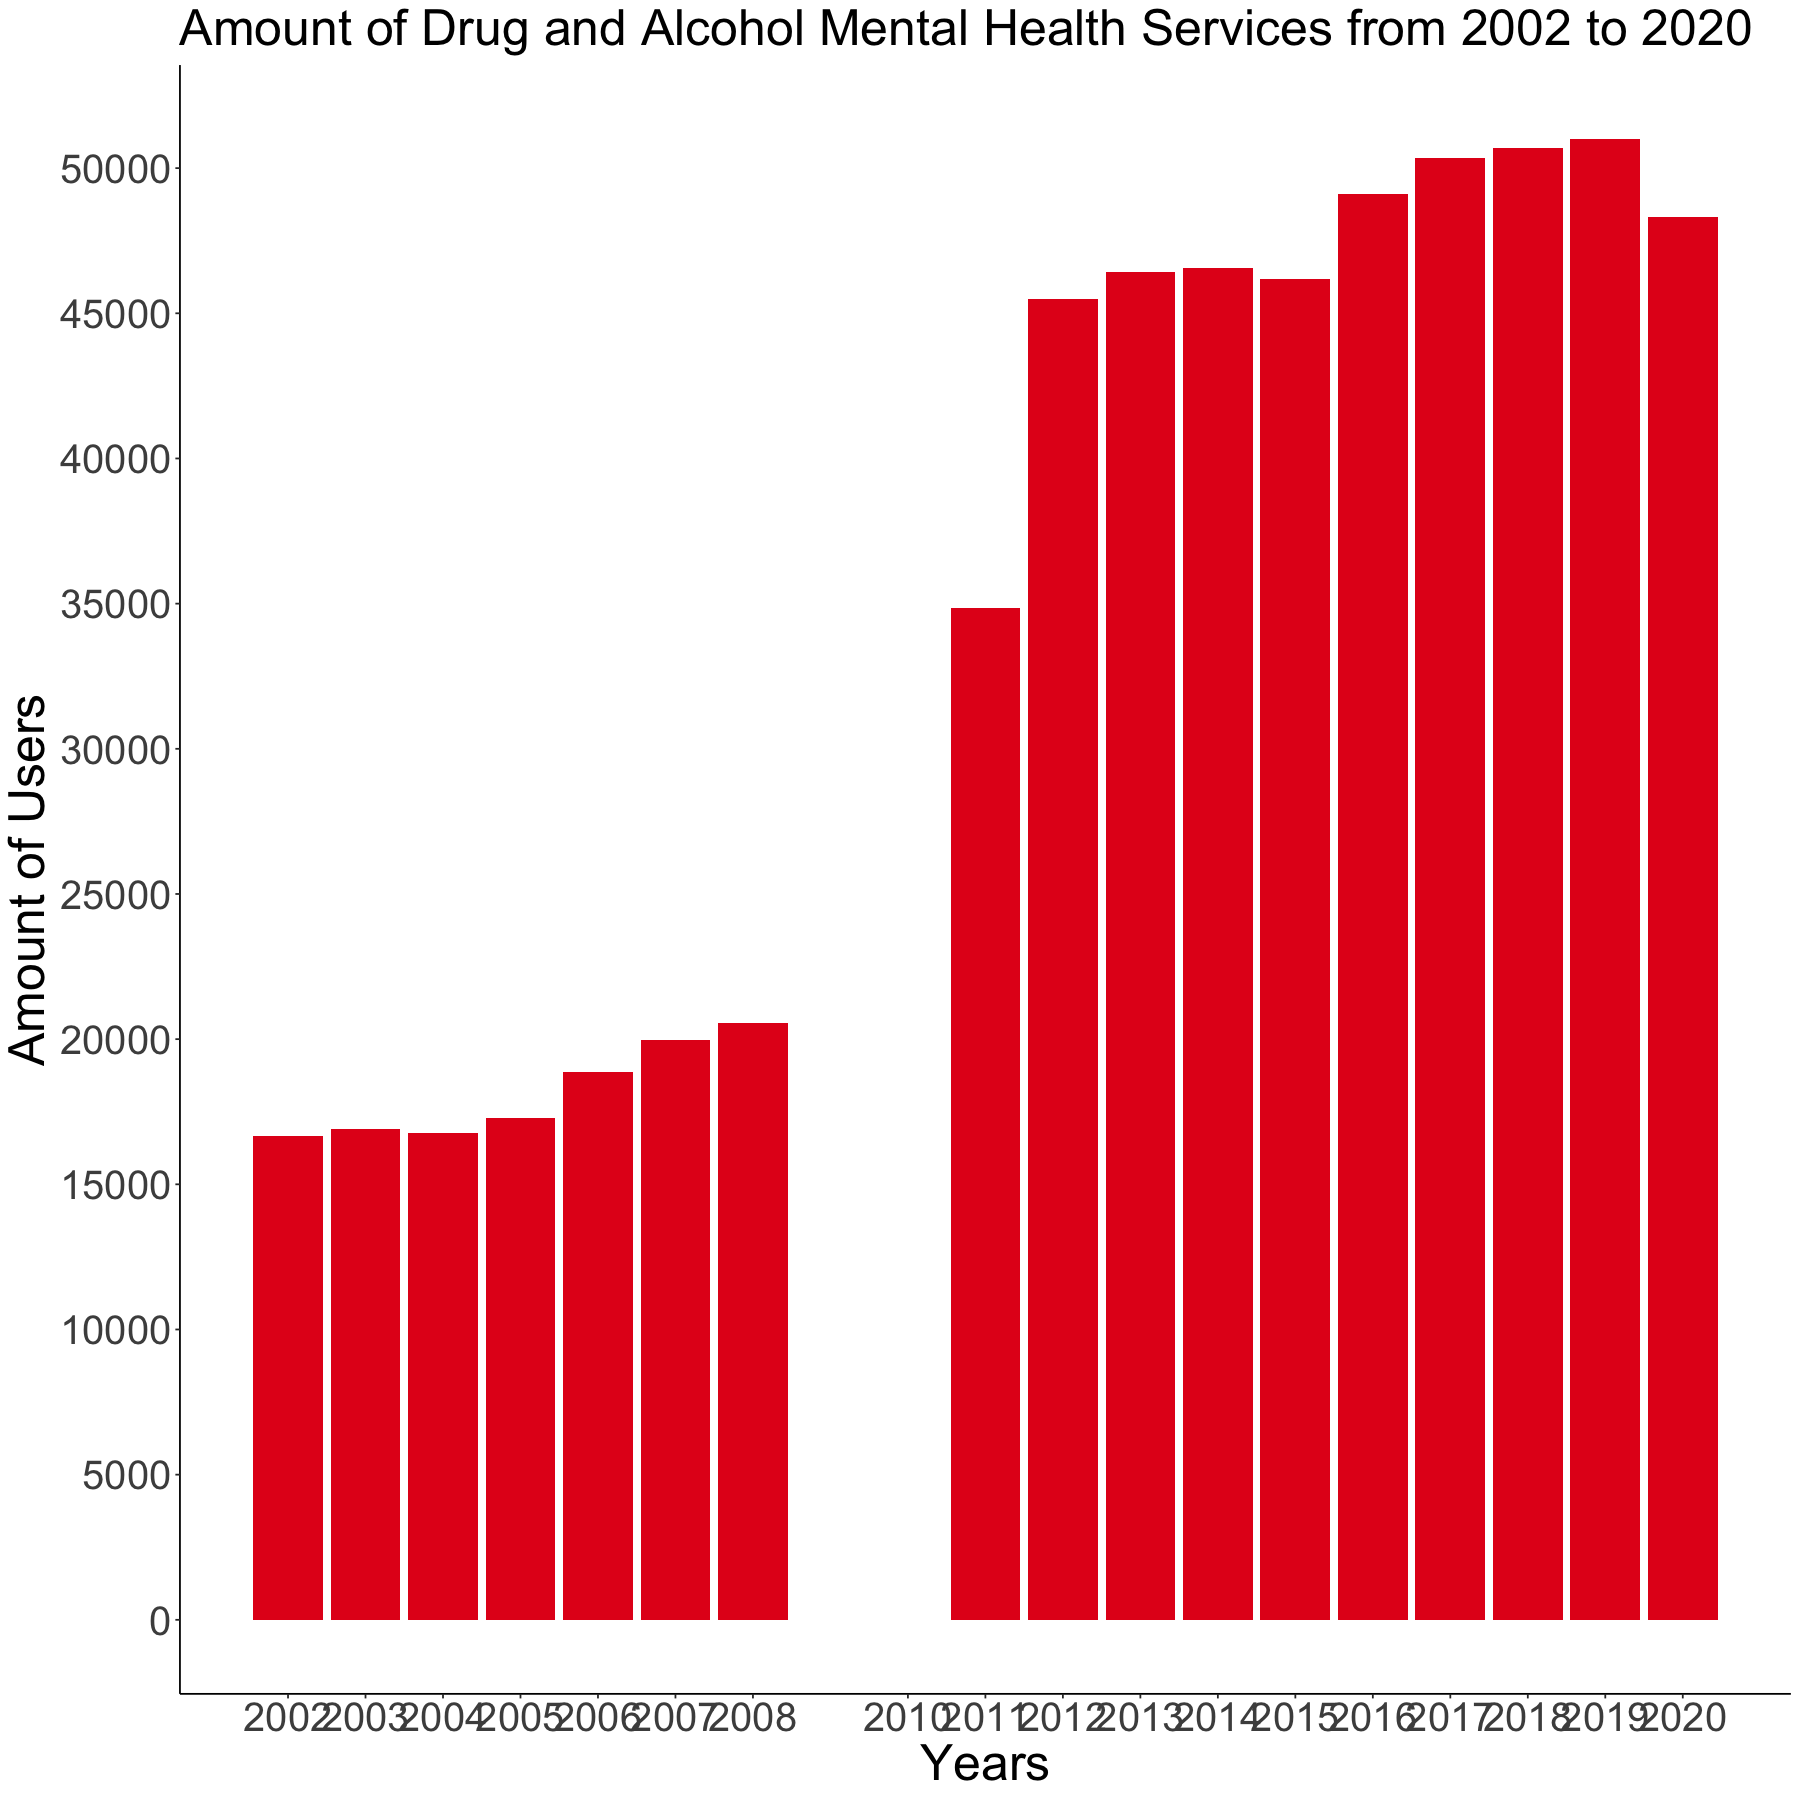

In [156]:


service_data %>% filter(activity=='alcohol and drug team') %>%
                group_by(year, activity) %>% 
                select(year, activity, amount) %>%
                summarise(sum_amount = round(sum(amount)), .groups='drop_last') %>%  # getting the mean amount of users for each user type by hour (droping the last column)
                ggplot( aes(fill=activity, y=sum_amount, x=year)) + 
                geom_bar(position="stack", stat="identity") + 
                scale_x_continuous(breaks=years$year) + 
                labs(x= "Years", 
                     y='Amount of Users',
                     fill='Service',
                     title='Amount of Drug and Alcohol Mental Health Services from 2002 to 2020') +
                    theme_classic() + theme(plot.title = element_text(size=30),
                                          text = element_text(size=30))  +


                    scale_fill_brewer(palette="Set1") +  #assigning pallete
 
                scale_y_continuous(breaks=seq(0, 200000, 5000)) + guides(fill=FALSE)

ggsave('service.png', scale=3)
